# API Exercises

Here are two exercises that involve working with APIs and dictionaries.

One is using the Open Brewery API found at https://www.openbrewerydb.org/, and the other is using the API for UK Police Data, found at https://data.police.uk/docs/.

You can complete them in either order!

Remember that you can create new cells with esc + a or b

## Breweries

### Q1: Load the first page of results with 50 results per page

In [1]:
import json
import requests
import pandas as pd
import math

url_1 = 'https://api.openbrewerydb.org/breweries?page=1&per_page=50'

response_1 = requests.get(url_1)

data = response_1.json()
data

[{'id': 2,
  'name': 'Avondale Brewing Co',
  'brewery_type': 'micro',
  'street': '201 41st St S',
  'city': 'Birmingham',
  'state': 'Alabama',
  'postal_code': '35222-1932',
  'country': 'United States',
  'longitude': '-86.774322',
  'latitude': '33.524521',
  'phone': '2057775456',
  'website_url': 'http://www.avondalebrewing.com',
  'updated_at': '2018-08-23T23:19:57.825Z',
  'tag_list': []},
 {'id': 4,
  'name': 'Band of Brothers Brewing Company',
  'brewery_type': 'micro',
  'street': '1605 23rd Ave',
  'city': 'Tuscaloosa',
  'state': 'Alabama',
  'postal_code': '35401-4653',
  'country': 'United States',
  'longitude': '-87.5621551272424',
  'latitude': '33.1984907123707',
  'phone': '2052665137',
  'website_url': 'http://www.bandofbrosbrewing.com',
  'updated_at': '2018-08-23T23:19:59.462Z',
  'tag_list': []},
 {'id': 44,
  'name': 'Trim Tab Brewing',
  'brewery_type': 'micro',
  'street': '2721 5th Ave S',
  'city': 'Birmingham',
  'state': 'Alabama',
  'postal_code': '3523

### Q2: This is only the first 50 results.  Get the next 50 and put them together.

In [2]:
url_2 = 'https://api.openbrewerydb.org/breweries?page=2&per_page=50'
response_2 = requests.get(url_2)

data_2 = response_2.json()

for d in data_2:
    data.append(d)

data[0].keys()

dict_keys(['id', 'name', 'brewery_type', 'street', 'city', 'state', 'postal_code', 'country', 'longitude', 'latitude', 'phone', 'website_url', 'updated_at', 'tag_list'])

### Q3: How many of these 100 breweries in are in Alaska?

In [3]:
counter = 0

for i in data:
    if i['state'] == 'Alaska':
        counter += 1
counter

3

### Q4: Of these 100 breweries, what are the different unique brewery types?

In [4]:
set([i['brewery_type'] for i in data])

{'brewpub', 'contract', 'micro', 'planning', 'proprietor', 'regional'}

### Q5: What is the cloest brewery to "Devil's Potion Brewing Company LLC" ?
* Hint 1: Use Euclidian distance w/ longitude and latitude (assume longitude and latitude are a Carteisan coordinate system)
* Hint 2: You'll have to ignore the entries with "none" for latitude or longitude

In [5]:
### Create list of Breweries with Latitude and Longitude

potential_breweries = []

for i in data:
    if i['longitude'] and i['latitude']:
        potential_breweries.append(i['name'])

### Ensure Latitude and Longitude are Floats

for i in data:
    if type(i['latitude']) == str:
        i['latitude'] = float(i['latitude'])
        
    
    if type(i['longitude']) == str:
        i['longitude'] = float(i['longitude'])
        
### Distance Function
def distance(lat0, long0, lat1, long1):
    deglen = 110.25
    x = lat0 - lat1
    y = (long0 - long1) * math.cos(lat0)
    return deglen * math.sqrt(x*x + y*y)

### Find Lat / Long for reach Brewery
def find_lat_long(brewery):
    lat, long = 0, 0
    for i in data:
        if i['name'] == brewery:
            lat, long = i['latitude'], i['longitude']
    return lat, long


## Find Closest Brewery Function
def find_closest_brewery(brewery_1, list_of_breweries):
    
    closest_distance, closest_brewery = 0, ''
    
    for brewery in list_of_breweries:
        
        dist = distance(find_lat_long(brewery_1)[0], find_lat_long(brewery_1)[1], 
                            find_lat_long(brewery)[0], find_lat_long(brewery)[1])
        
        if dist > closest_distance:
            closest_distance, closest_brewery = dist, brewery
    
    return closest_brewery
        
brewery_1 = "Devil's Potion Brewing Company LLC"

lat_0 = find_lat_long(brewery_1)[0]
long0 = find_lat_long(brewery_1)[1]

find_closest_brewery(brewery_1, potential_breweries)

'Bearpaw River Brewing Co'

In [6]:
find_closest_brewery('Black Hammer Brewing', potential_breweries)


'King Street Brewing Co'

### Q7: How would you get the first 10 pages from this API and put them all together using a for loop?

In [7]:


n = 10
data = []

#response_2 = requests.get(url_2)

#data_2 = response_2.json()

for i in range(n):
    url = 'https://api.openbrewerydb.org/breweries?page={}&per_page=50'.format(i+1)
    r = requests.get(url)
    data += r.json()

len(data)

500

# Crime in the UK

### We will be analyzing different crimes reported in the UK as provided by https://data.police.uk/docs/

# Exploratory analysis
##### 1. How many total crimes were there at latitude : 52.63902 and -1.131321 on November of 2017.
Use the street level crimes data, the documentation for the API can be found at https://data.police.uk/docs/method/crime-street/

In [8]:
def insert_params(lat, long, date):
    url = 'https://data.police.uk/api/crimes-street/all-crime?lat={}&lng={}&date={}'.format(lat, long, date)
    return url

url = insert_params(52.63902, -1.131321, '2017-11')

r = requests.get(url)
data = r.json()

len(data)

1334

##### 2. We've queried the API once, but it could get annoying to retype the url over and over again, create a function `make_api_request` that enables you to query the API.


 The parameters for the function should be:
* lat (float) : latitude
* lng (float) : longitude
* date (string): Date in the format YYYY-MM
    * default value = `None`
    
And it should return a json object of 

for more information on default values check out http://blog.thedigitalcatonline.com/blog/2015/02/11/default-arguments-in-python/

In [ ]:
def make_api_request(lat, long, date=None):
    
    if date:
        url = 'https://data.police.uk/api/crimes-street/all-crime?lat={}&lng={}&date={}'.format(lat, long, date)
    else:
        url = 'https://data.police.uk/api/crimes-street/all-crime?lat={}&lng={}'.format(lat, long)
    
    r = requests.get(url)
    data = r.json()
    return data

make_api_request(52.63902, -1.131321)


##### 3. Write a function `categories_of_crime` that will determine the count of each type of crime for a given latitude and longitude. This is labelled as 'category' in the records. Your function should call the `make_api_request` function you created.

The parameters for the function should be:

* lat (float) : latitude
* lng (float) : longitude
* date (str) default = None

The function should return:
* a dictionary with the count of each type of crime



Once you've created the function, try it with these locations
* lat, lng of 51.5017861,-0.1432319   (Buckingham Palace)
* lat, lng of 53.480161, -2.245163     (Manchester)

In [ ]:
def categories_of_crime(lat, long, date=None):
    categorized_crimes = {}
    all_crimes = make_api_request(lat, long, date)
    for i in all_crimes:
        categorized_crimes[i['category']] = categorized_crimes.get(i['category'], 0) + 1
    return categorized_crimes

categories_of_crime(51.5017861, -0.1432319)


**Bonus**: 
* Write a function that determines the difference between Buckingham Palace and Manchester in terms of the number of crimes in each category.
    * In which category is there the largest absolute difference between the category of crime?
* Create a histogram depiction of the categories of crime

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efe278e1940>]],
      dtype=object)

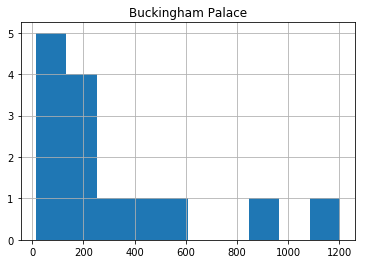

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Buckingham Palace Crimes
bp_crimes = categories_of_crime(51.5017861, -0.1432319)

#Manchester Crimes
m_crimes = categories_of_crime(53.480161, -2.245163)

df = pd.DataFrame({'Buckingham Palace': pd.Series(bp_crimes), 'Manchester': pd.Series(m_crimes)})

df['Difference'] = abs(df['Buckingham Palace'] - df['Manchester'])

##### 4. Create a function `find_outcome_statuses` that will determine outcome statuses for a given latitude and longitude and date (optional)?
Investigate the data to determine where the outcome statuses are located.

**NOTE**: You'll notice that some of these crimes do not have crime outcomes. Make these into the category of "Not Resolved."

**NOTE 2**: These might take a long time to execute if you do not specify a month

**Bonus**: What is the ratio of crimes investigated to those not investigated? Is it higher near London or Manchester?

##### 5. Write a function `month_highest_crimes` that will return the month that had the highest number of crimes for a latitude, longitude and a year.

Inputs
* lat (float) : latitude
* lng (float) : longitude
* year (str) : in the format YYYY

Output
* month with highest crime (int)

**Bonus** Make a graph of how the number of crimes changed over time for a year. This will likely require a new function. Is seasonality a factor? Do the type of crimes change over time?

### Bonus Open Ended Questions

1. Take a look at the https://data.police.uk/docs/method/stops-street/ API. Is there a correlation between gender and being stopped and searched? How about race and being stopped and searched?